## Install and import essential modules

In [62]:
# this installation check, checks if there are all required modules installed on
# user machine
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.datasets import load_boston
% matplotlib inline

### Load boston dataset

In [63]:
boston = load_boston()

## Analyse and understand the data

In [64]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data frame creation

In [65]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['Price'] = boston.target
print(data.isnull().values.any())
data

False


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Price distibution plot 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


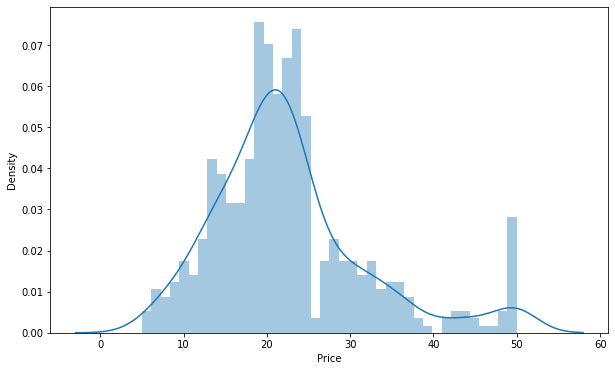

In [66]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Price'],bins=40)

In [67]:
data.nlargest(20,'Price')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


### Heatmap of all of the parameteres

<function matplotlib.pyplot.show>

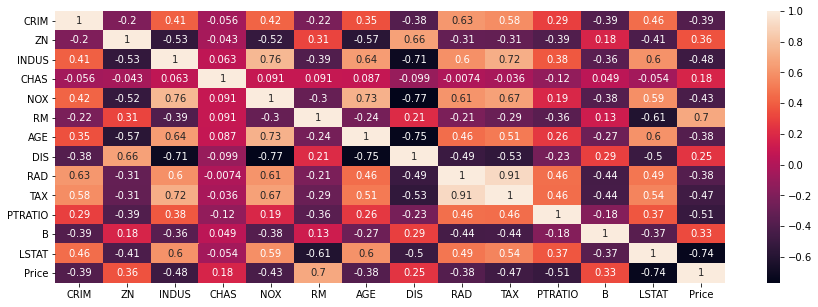

In [68]:
correlation_map = data.corr()
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(correlation_map,annot = True)
plt.show

### Select the most important correlations

In [69]:
features=[]
values=[]
for i, index in enumerate(correlation_map['Price'].index):
    if abs(correlation_map['Price'][index])> 0.45:
        features.append(index)
        values.append(correlation_map['Price'][index])
        
df = pd.DataFrame(data = values, index = features, columns=['Correlated Values'])
df

,Correlated Values
INDUS,-0.483725
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [70]:
correlated_data = data[df.index]
correlated_data

,INDUS,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,6.575,296.0,15.3,4.98,24.0
1,7.07,6.421,242.0,17.8,9.14,21.6
2,7.07,7.185,242.0,17.8,4.03,34.7
3,2.18,6.998,222.0,18.7,2.94,33.4
4,2.18,7.147,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...
501,11.93,6.593,273.0,21.0,9.67,22.4
502,11.93,6.120,273.0,21.0,9.08,20.6
503,11.93,6.976,273.0,21.0,5.64,23.9
504,11.93,6.794,273.0,21.0,6.48,22.0


####The heatmap of the most important correlations

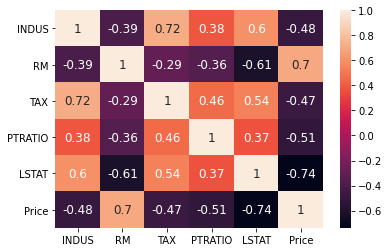

In [71]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12},linewidth =0)
plt.show()

### Splitting the data for the model

After a quick check, by selecting the most correlated data model accuracy drops by ca. 2pp at random forest regressor. In conclusion, selecting only important parameters can be useful by in large scale projects, but in this specific case it only worsen the final results. However it might be useful in larger datasets

In [ ]:
# X = correlated_data.drop(columns= ['Price'], axis=1)
# y= correlated_data['Price']
# print(X.head())
# print(y.head())

In [72]:
X = data.drop(columns= ['Price'], axis=1)
y= data['Price']
print(X.head())
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64


### Function for plotting model differences

In [ ]:
### This function helps to plot multiple two models at the same time.

### As an input it takes:
###     -the data frame X and the target y,
###     -the flag 'poly' to define whether to use polynomial function or not
###     -correlation to plot on a chart


In [55]:
def plot_models(X, y,correlation="LSTAT",  ):
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    sc=StandardScaler()
    X = sc.fit_transform(X)
    modelList=[LinearRegression(), RandomForestRegressor()]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
    index=data.keys().get_loc(correlation)
    
    for row in range(len(axes)):
      for model in modelList:
        model = model
        if row == 1:
          X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
          X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
          model.fit(X_train_poly, y_train.reshape(-1, 1))
          y_test_pred = model.predict(X_test_poly)
        else:
          model.fit(X_train, y_train.reshape(-1, 1))
          y_test_pred = model.predict(X_test)
        inv_sc= sc.inverse_transform(X_test)
 
        axes[row][modelList.index(model)].scatter(inv_sc[:,index], y_test, label = "Real values");
        axes[row][modelList.index(model)].scatter(inv_sc[:,index], y_test_pred, label = "Predicted values");
        axes[row][modelList.index(model)].legend()
        axes[row][modelList.index(model)].grid()

        axes[row][modelList.index(model)].set_yticks(np.arange(0, 54, 2))

        score = r2_score(y_test, y_test_pred)

        axes[row][modelList.index(model)].set_title(type(model).__name__+ (' Polynomial' if row==1 else ''), fontsize=30 )
        axes[row][modelList.index(model)].set_xlabel(('(%) LSTAT\n' if correlation=="LSTAT" else 'Number of rooms\n')+
                                                    f'Accuracy {round(score,3)}   '
                                                    f'R^2:{round(r2_score(y_test, y_test_pred),3)}    '   
                                                    f'Adjusted R^2:{round(1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),3)}\n'
                                                    f'MAE:{round(mean_absolute_error(y_test, y_test_pred),3)}   '
                                                    f'MSE:{round(mean_squared_error(y_test, y_test_pred),3)}    '
                                                    f'RMSE:{round(mean_squared_error(y_test, y_test_pred, squared=False),3)}    \n', fontsize=18)
        axes[row][modelList.index(model)].set_ylabel("Price of a house", fontsize=20)

    fig.tight_layout(pad=3.0)
    return plt

##Comparison of lower status of the population and room number to house price and its predicted values 

In [ ]:
### Define the input data and the target
### Scale and split the results for model training 

In [78]:
X = data.drop(columns= ['Price'], axis=1).values
y= data['Price'].values
sc=StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)


### House price vs lower status of the population


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>


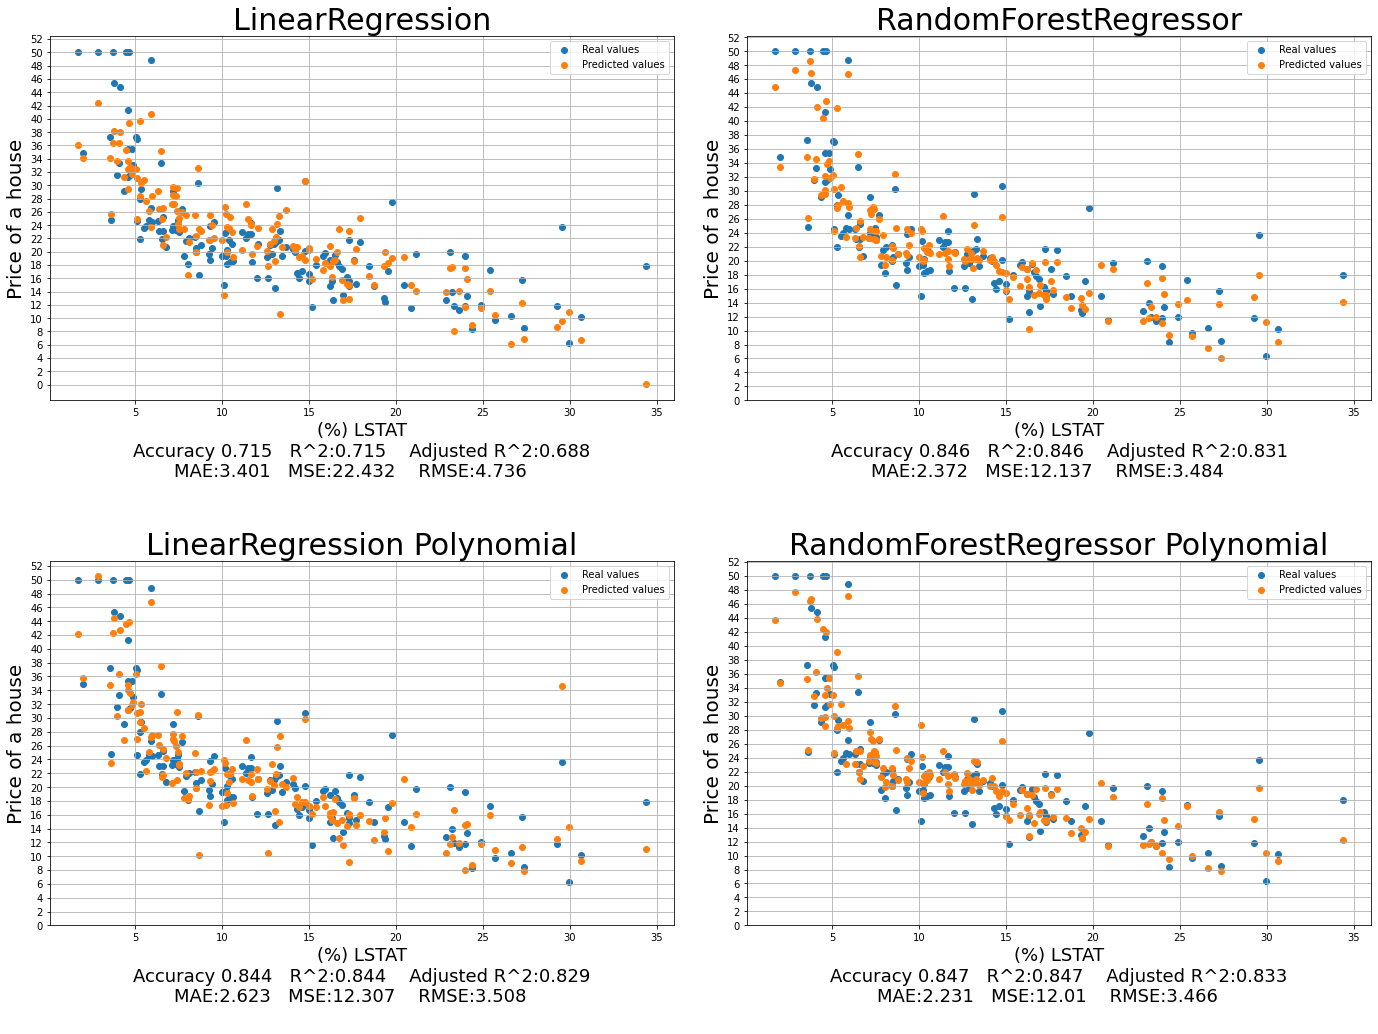

In [74]:
print(plot_models(X, y, correlation="LSTAT"))

###House price vs average number of rooms per dwelling

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>


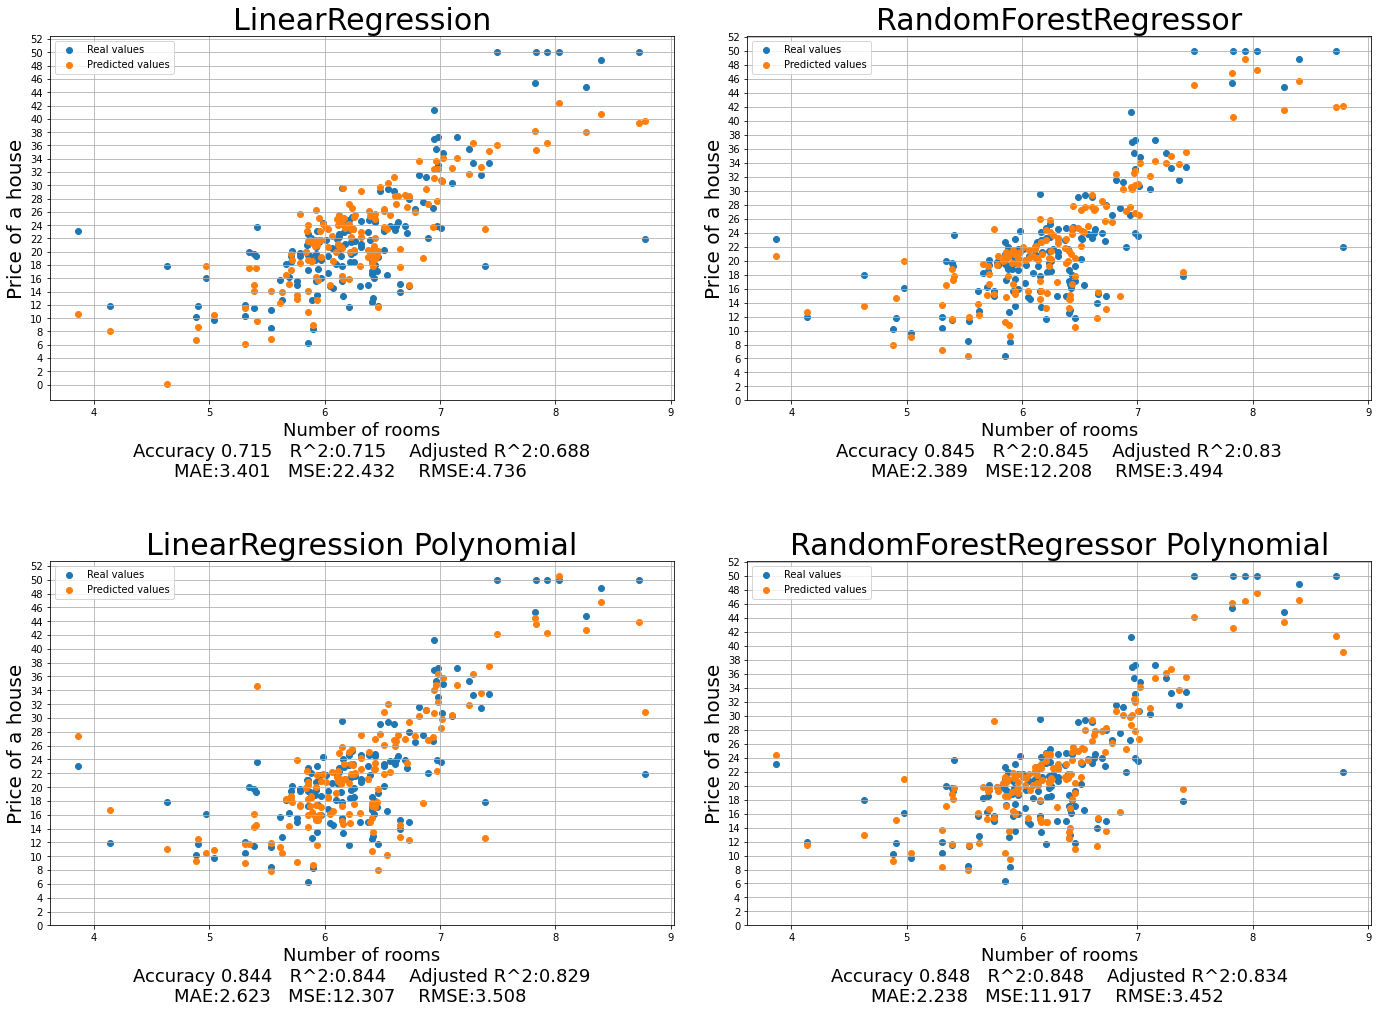

In [75]:
print(plot_models(X, y, correlation="RM"))

### Initial Model Accuracy Comparison. 
Comparing default model evaluation metrics

In [79]:
polynomial_feature = PolynomialFeatures(degree=2)
X_train_poly = polynomial_feature.fit_transform(X_train)
X_test_poly = polynomial_feature.fit_transform(X_test)


poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
linear_y_test_pred = poly_lin_reg.predict(X_test_poly)

print("Model evaluation metrics: \n")
print('\tR^2:',r2_score(y_test, linear_y_test_pred))
print('\tAdjusted R^2:',1 - (1-r2_score(y_test, linear_y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('\tMAE:',mean_absolute_error(y_test, linear_y_test_pred))
print('\tMSE:',mean_squared_error(y_test, linear_y_test_pred))
print('\tRMSE:',mean_squared_error(y_test, linear_y_test_pred, squared=False))

Model evaluation metrics: 

	R^2: 0.8435248771516094
	Adjusted R^2: 0.8287844670282103
	MAE: 2.623336631373355
	MSE: 12.306841014749123
	RMSE: 3.5081107472183835


In [80]:
poly_reg_3 = PolynomialFeatures(degree=2)
X_train_poly = poly_reg_3.fit_transform(X_train)
X_test_poly = poly_reg_3.fit_transform(X_test)

RFR_model= RandomForestRegressor()
RFR_model.fit(X_train_poly, y_train)
rfr_y_test_pred = RFR_model.predict(X_test_poly)

print("Model evaluation metrics: \n")
print('\tR^2:',r2_score(y_test, rfr_y_test_pred))
print('\tAdjusted R^2:',1 - (1-r2_score(y_test, rfr_y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('\tMAE:',mean_absolute_error(y_test, rfr_y_test_pred))
print('\tMSE:',mean_squared_error(y_test, rfr_y_test_pred))
print('\tRMSE:',mean_squared_error(y_test, rfr_y_test_pred, squared=False))

Model evaluation metrics: 

	R^2: 0.84556113101051
	Adjusted R^2: 0.8310125419028045
	MAE: 2.2455855263157893
	MSE: 12.146688703947367
	RMSE: 3.485209994239568


### Model predictoin accuracy.Visualizing the differences between actual prices and predicted values

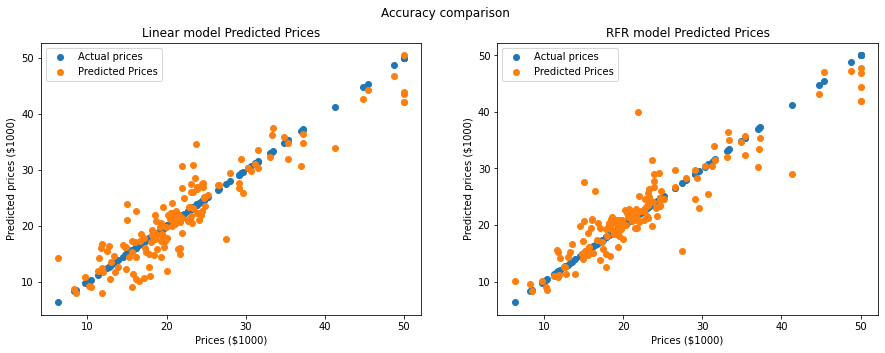

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.suptitle("Accuracy comparison")
ax[0].scatter(y_test, y_test, label="Actual prices")
ax[0].scatter(y_test, linear_y_test_pred, label="Predicted Prices")
ax[0].set_xlabel("Prices ($1000)")
ax[0].set_ylabel("Predicted prices ($1000)")
ax[0].set_title("Linear model Predicted Prices")
ax[0].legend()

ax[1].scatter(y_test, y_test, label="Actual prices")
ax[1].scatter(y_test, rfr_y_test_pred, label="Predicted Prices")
ax[1].set_xlabel("Prices ($1000)")
ax[1].set_ylabel("Predicted prices ($1000)")
ax[1].set_title("RFR model Predicted Prices")
ax[1].legend()
plt.show()

##Hyperparameter tunning and Crossvalidation

### Model hyperparameter tuning with RandomisedSearchCV and model evaluation metrics

In [82]:
X = data.drop(columns= ['Price'], axis=1).values
y= data['Price'].values

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)


In [83]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(start = 10, stop =1000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2,3,4,5]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
random_grid=m_random.best_params_
random_grid

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 570}

In [84]:
for degree in range(1, 5,1):
    print(degree)
    poly_reg_3 = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg_3.fit_transform(X_train)
    X_test_poly = poly_reg_3.fit_transform(X_test)

    RFR_model= RandomForestRegressor(n_estimators=random_grid['n_estimators'], 
                            min_samples_leaf=random_grid['min_samples_leaf'], 
                            max_features=random_grid['max_features'], 
                            bootstrap=random_grid['bootstrap'], n_jobs=-1)
    RFR_model.fit(X_train_poly, y_train)
    rfr_y_test_pred = RFR_model.predict(X_test_poly)

    print("Model evaluation metrics: \n")
    print('\tR^2:',r2_score(y_test, rfr_y_test_pred))
    print('\tAdjusted R^2:',1 - (1-r2_score(y_test, rfr_y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
    print('\tMAE:',mean_absolute_error(y_test, rfr_y_test_pred))
    print('\tMSE:',mean_squared_error(y_test, rfr_y_test_pred))
    print('\tRMSE:',mean_squared_error(y_test, rfr_y_test_pred, squared=False))

1
Model evaluation metrics: 

	R^2: 0.874254675157176
	Adjusted R^2: 0.8624091010777796
	MAE: 2.146132848568797
	MSE: 9.889928143325529
	RMSE: 3.1448256141359456
2
Model evaluation metrics: 

	R^2: 0.859666445703321
	Adjusted R^2: 0.8464466181246483
	MAE: 2.2060653277931728
	MSE: 11.03729915864806
	RMSE: 3.3222430914441015
3
Model evaluation metrics: 

	R^2: 0.8323393334825022
	Adjusted R^2: 0.8165452127236075
	MAE: 2.292127192982465
	MSE: 13.186589214292729
	RMSE: 3.6313343572704415
4
Model evaluation metrics: 

	R^2: 0.813726241387162
	Adjusted R^2: 0.7961787134018946
	MAE: 2.36262927054479
	MSE: 14.650517543859726
	RMSE: 3.8275994492448824


### Final model result


In [87]:
X = data.drop(columns= ['Price'], axis=1).values
y= data['Price'].values

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

poly_reg_3 = PolynomialFeatures(degree=1)
X_train_poly = poly_reg_3.fit_transform(X_train)
X_test_poly = poly_reg_3.fit_transform(X_test)

RFR_model= RandomForestRegressor(n_estimators=random_grid['n_estimators'], 
                            min_samples_leaf=random_grid['min_samples_leaf'], 
                            max_features=random_grid['max_features'], 
                            bootstrap=random_grid['bootstrap'], n_jobs=-1)
RFR_model.fit(X_train_poly, y_train)
rfr_y_test_pred = RFR_model.predict(X_test_poly)

print("Model evaluation metrics: \n")
print('\tR^2:',r2_score(y_test, rfr_y_test_pred))
print('\tAdjusted R^2:',1 - (1-r2_score(y_test, rfr_y_test_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('\tMAE:',mean_absolute_error(y_test, rfr_y_test_pred))
print('\tMSE:',mean_squared_error(y_test, rfr_y_test_pred))
print('\tRMSE:',mean_squared_error(y_test, rfr_y_test_pred, squared=False))

Model evaluation metrics: 

	R^2: 0.8713731757373746
	Adjusted R^2: 0.8592561560604606
	MAE: 2.1389796860572567
	MSE: 10.11655940967672
	RMSE: 3.180653927996053


### Distribution plot, representing number of errors in prediction results

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


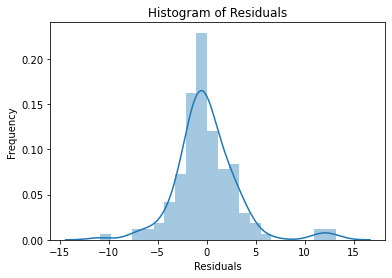

In [88]:
sns.distplot(y_test-rfr_y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### A learning curve shows the validation and training score of an estimator for varying numbers of training samples.

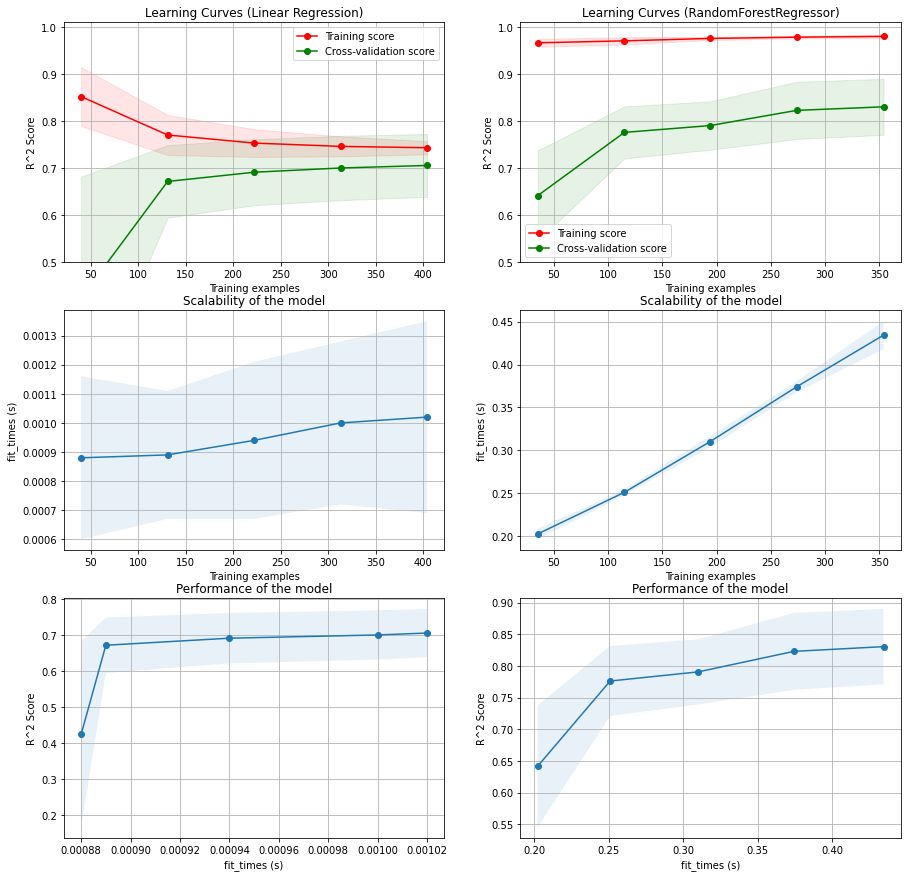

In [90]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("R^2 Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.round(np.mean(fit_times, axis=1),5)
    fit_times_std = np.round(np.std(fit_times, axis=1),5)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times (s)")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times (s)")
    axes[2].set_ylabel("R^2 Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(15, 15))

X, y = load_boston(return_X_y=True)

title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5))

title = r"Learning Curves (RandomForestRegressor)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = RandomForestRegressor()#n_estimators=random_grid['n_estimators'], 
                            #min_samples_leaf=random_grid['min_samples_leaf'], 
                            #max_features=random_grid['max_features'], 
                            #bootstrap=random_grid['bootstrap'])
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5))

plt.show()